# Hello Bioinformatics
Pierwszy notebook testowy. </br>
Cel: wszytać dane, sprawdzić je i wyciągnąć proste wnioski

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    "gene": ["TP53", "BRCA1", "MYC", "EGFR", "PTEN"],
    "expression": [120, 80, 500, 300, 60],
    "pvalue": [0.01, 0.2, 0.0001, 0.03, 0.04]
})

df


,gene,expression,pvalue
0,TP53,120,0.0100
1,BRCA1,80,0.2000
2,MYC,500,0.0001
3,EGFR,300,0.0300
4,PTEN,60,0.0400


In [4]:
df.head()
df.shape
df.columns

Index(['gene', 'expression', 'pvalue'], dtype='object')

In [5]:
df.shape

(5, 3)

In [6]:
df.columns

Index(['gene', 'expression', 'pvalue'], dtype='object')

In [7]:
df.head()

,gene,expression,pvalue
0,TP53,120,0.0100
1,BRCA1,80,0.2000
2,MYC,500,0.0001
3,EGFR,300,0.0300
4,PTEN,60,0.0400


In [8]:
significant = df[df["pvalue"] < 0.05]
significant

,gene,expression,pvalue
0,TP53,120,0.0100
2,MYC,500,0.0001
3,EGFR,300,0.0300
4,PTEN,60,0.0400


In [9]:
df["log_expression"] = np.log2(df["expression"] + 1)
df

,gene,expression,pvalue,log_expression
0,TP53,120,0.0100,6.918863
1,BRCA1,80,0.2000,6.339850
2,MYC,500,0.0001,8.968667
3,EGFR,300,0.0300,8.233620
4,PTEN,60,0.0400,5.930737


## Differential expression analysis (demo)

Below we visualize differential expression results using a volcano plot.
Genes with high |logFC| and low p-values are considered potentially significant.


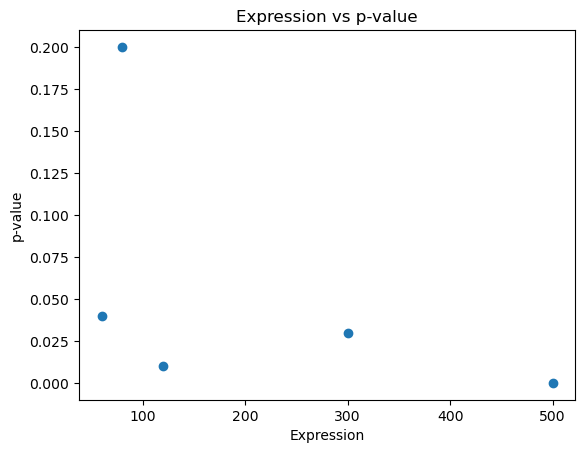

In [10]:
plt.scatter(df["expression"], df["pvalue"])
plt.xlabel("Expression")
plt.ylabel("p-value")
plt.title("Expression vs p-value")
plt.savefig("volcano_plot.png", dpi=300, bbox_inches="tight")
plt.show()


- Four out of the five genes are significant in terms of expression 
- Gene MYC and gene EGFR both have high expression and love p-value
- Provided data is fine for futher analysis

In [24]:
df["logFC"] = np.log2(df["expression"] / df["expression"].mean())
df

,gene,expression,pvalue,log_expression,logFC,neg_log10_p
0,TP53,120,0.0100,6.918863,-0.821030,2.000000
1,BRCA1,80,0.2000,6.339850,-1.405992,0.698970
2,MYC,500,0.0001,8.968667,1.237864,4.000000
3,EGFR,300,0.0300,8.233620,0.500898,1.522879
4,PTEN,60,0.0400,5.930737,-1.821030,1.397940


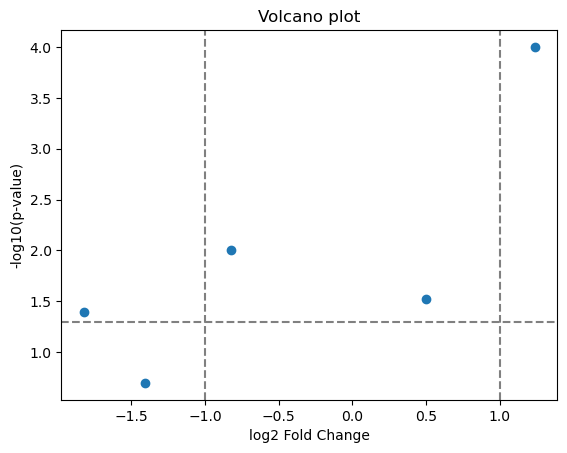

In [25]:
df["neg_log10_p"] = -np.log10(df["pvalue"])

plt.scatter(df["logFC"], df["neg_log10_p"])
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10(p-value)")
plt.title("Volcano plot")
plt.axvline(x=1, color="grey", linestyle="--")
plt.axvline(x=-1, color="grey", linestyle="--")
plt.axhline(y=1.3, color="grey", linestyle="--")
plt.show()

In [26]:
df["significant"] = (df["pvalue"] < 0.05) & (abs(df["logFC"]) > 1)
df

,gene,expression,pvalue,log_expression,logFC,neg_log10_p,significant
0,TP53,120,0.0100,6.918863,-0.821030,2.000000,False
1,BRCA1,80,0.2000,6.339850,-1.405992,0.698970,False
2,MYC,500,0.0001,8.968667,1.237864,4.000000,True
3,EGFR,300,0.0300,8.233620,0.500898,1.522879,False
4,PTEN,60,0.0400,5.930737,-1.821030,1.397940,True


In [27]:
df[df["significant"]]

,gene,expression,pvalue,log_expression,logFC,neg_log10_p,significant
2,MYC,500,0.0001,8.968667,1.237864,4.00000,True
4,PTEN,60,0.0400,5.930737,-1.821030,1.39794,True


##  Extended conclusion </br>
- Volcano plot shows several genes that are significantly differentially expressed.
- Genes with high logFC and low p-values are potentially biologically significant.
- The analysis is demonstrative in nature but reflects a real RNA-seq workflow.